In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


                       Correlation Coefficient
education_of_employee                 0.318189
unit_of_wage                          0.207528
has_job_experience                    0.192162
Quality_Rating                        0.191806
prevailing_wage                       0.168009
continent                             0.105613
Prev_wage_normal                      0.084993
region_of_employment                  0.053490
no_of_employees                       0.027558
full_time_position                    0.012711
yr_of_estab                           0.008597
age_of_estab                          0.008597
yr_of_estab_str                       0.008481
requires_job_training                 0.008423


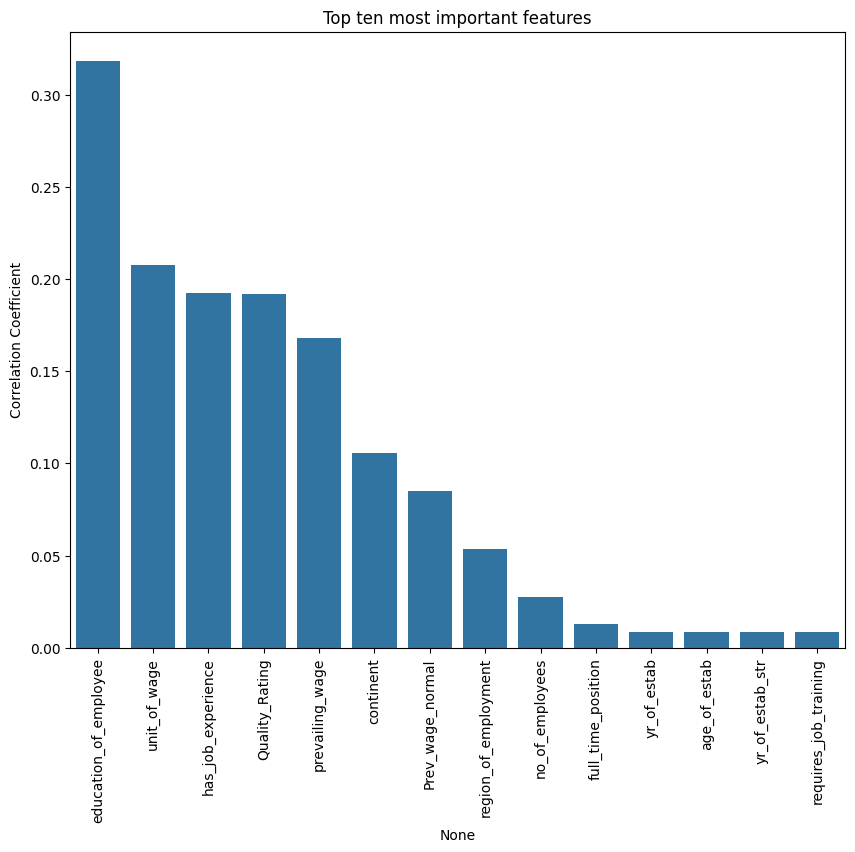

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Prev_wage_normal,age_of_estab,Quality_Rating,yr_of_estab_str
0,3,0,0.0,0.0,9.582800,2007,4.0,6.383849,0.0,1.0,0,1231782.032,18,1,189.0
1,3,2,1.0,0.0,7.788212,2002,2.0,11.331711,3.0,1.0,1,83425.650,23,3,184.0
2,3,1,0.0,1.0,10.701985,2008,4.0,11.719914,3.0,1.0,0,122996.860,17,2,190.0
3,3,1,0.0,0.0,4.584967,1897,4.0,11.331812,3.0,1.0,0,83434.030,128,1,79.0
4,4,2,1.0,0.0,6.986566,2005,3.0,11.917773,3.0,1.0,1,149907.390,20,3,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,3,1,1.0,1.0,7.863651,2008,3.0,11.252762,3.0,1.0,1,77092.570,17,4,190.0
25476,3,0,1.0,0.0,8.093768,2006,2.0,12.539593,3.0,1.0,1,279174.790,19,3,188.0
25477,3,2,1.0,0.0,7.021976,1910,3.0,11.893407,3.0,0.0,1,146298.850,115,3,92.0
25478,3,2,1.0,1.0,7.559038,1887,4.0,11.363901,3.0,1.0,1,86154.770,138,4,69.0


In [ ]:
df = pd.read_csv("cleaned_data.csv")
df_copy = df.copy()
def data_preprocessing(data, current_year = 2025):  
    """
    data: pd.DataFrame
    
    Output
    processed_data:pd.DataFrame
    """
    #Handle negative values in "no_of_employees"
    data["no_of_employees"] = np.abs(data["no_of_employees"])
    data = data.drop("case_id", axis = 1)

    #Feature engineering
    def prev_wage_norm(data):
        if data["unit_of_wage"] == "Year":
            return data["prevailing_wage"]
        elif data["unit_of_wage"] == "Month":
            return data["prevailing_wage"] * 12
        elif data["unit_of_wage"] == "Week":
            return data["prevailing_wage"] * 52
        else:
            return data["prevailing_wage"] * 40 * 52
    
    data["Prev_wage_normal"] = data.apply(prev_wage_norm, axis = 1)
    data["age_of_estab"] = current_year - data["yr_of_estab"]

    def quality_assessment(data):
        if data["has_job_experience"] == "Y" and data["requires_job_training"] == "Y":
            return 4
        elif data["has_job_experience"] == "Y" and data["requires_job_training"] == "N":
            return 3
        elif data["has_job_experience"] == "N" and data["requires_job_training"] == "Y":
            return 2
        else:
            return 1
    data["Quality_Rating"]  = data.apply(quality_assessment, axis = 1)
    data["education_of_employee"] = data["education_of_employee"].map({"High School": 0, "Bachelor's": 1, "Master's": 2, "Doctorate": 3})
    data["continent"] = data["continent"].map({"South America": 0, "North America": 1, "Oceania": 2, "Asia": 3, "Africa": 4, "Europe": 5})
    obj_cols = [x for x in data.columns if data[x].dtype in ["category", object]]
    encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    

    data["yr_of_estab_str"] = data["yr_of_estab"].astype(str)
    num_cols = ["no_of_employees", "prevailing_wage"]
    obj_cols = [x for x in data.columns if data[x].dtype == object]
    obj_cols.remove("case_status")
    data["case_status"] = data["case_status"].map({"Denied": 0, "Certified": 1})
    for i in num_cols:
        data[i] = np.log(data[i])
    data[obj_cols] = encoder.fit_transform(data[obj_cols])

    corr_df = pd.DataFrame({"Correlation Coefficient": np.abs(data.corrwith(data["case_status"]))})
    corr_df_sorted = corr_df.sort_values("Correlation Coefficient", ascending=False).iloc[:, :10]
    corr_df_sorted = corr_df_sorted.iloc[1:]
    print(corr_df_sorted)

    plt.figure(figsize=(10,8))
    plt.title("Top ten most important features")
    sns.barplot(x = corr_df_sorted.index, y=corr_df_sorted["Correlation Coefficient"])
    plt.tick_params(axis="x", labelrotation = 90)
    plt.show()

    
    return data

data_preprocessing(df)

    

                       Correlation Coefficient
case_status                           1.000000
unit_of_wage                          0.207528
Quality_Rating                        0.193833
has_job_experience                    0.192162
prevailing_wage                       0.168009
Prev_wage_normal                      0.130571
region_of_employment                  0.053490
no_of_employees                       0.027558
age_of_estab                          0.015032
full_time_position                    0.012711
yr_of_estab_str                       0.008481
yr_of_estab                           0.008474
requires_job_training                 0.008423
continent                                  NaN
education_of_employee                      NaN


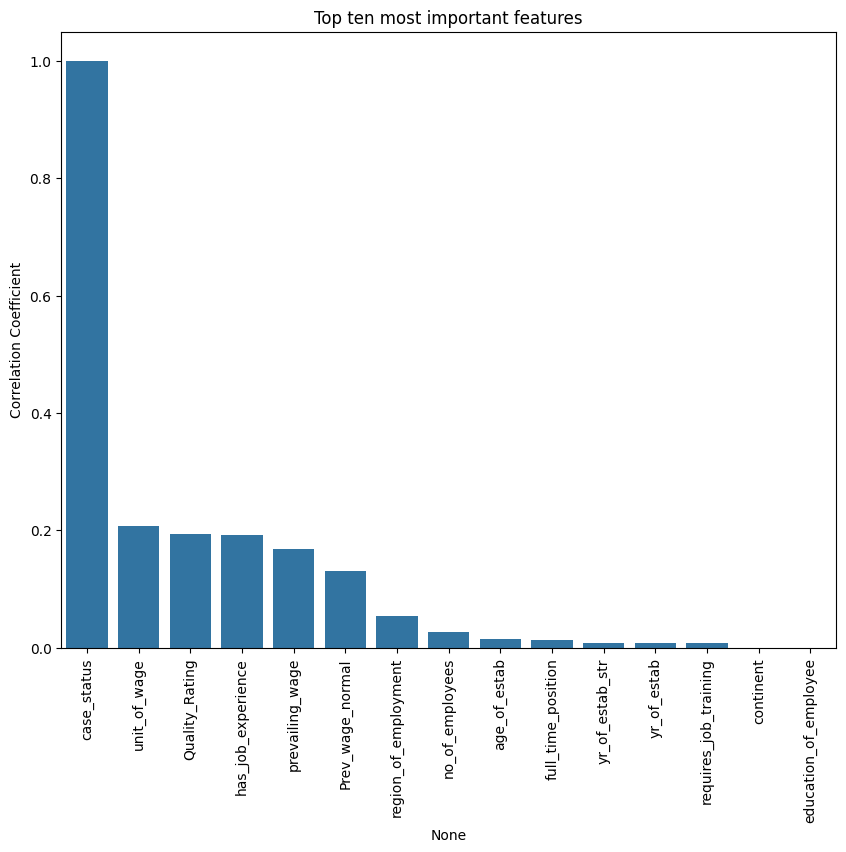

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Prev_wage_normal,age_of_estab,Quality_Rating,yr_of_estab_str
0,1.098612,-inf,0.0,0.0,9.582800,7.604396,4.0,6.383849,0.0,1.0,0,14.023972,2.890372,0.000000,189.0
1,1.098612,0.693147,1.0,0.0,7.788212,7.601902,2.0,11.331711,3.0,1.0,1,11.331711,3.135494,1.098612,184.0
2,1.098612,0.000000,0.0,1.0,10.701985,7.604894,4.0,11.719914,3.0,1.0,0,11.719914,2.833213,0.693147,190.0
3,1.098612,0.000000,0.0,0.0,4.584967,7.548029,4.0,11.331812,3.0,1.0,0,11.331812,4.852030,0.000000,79.0
4,1.386294,0.693147,1.0,0.0,6.986566,7.603399,3.0,11.917773,3.0,1.0,1,11.917773,2.995732,1.098612,187.0


In [ ]:
df2 = data_preprocessing(df)
df2.head()

In [4]:
df_copy

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
|